# Домашнее задание 4

Это домашнее задание по материалам второго семинаров. Дедлайн по отправке - 23:55 3 марта. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_4

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

# Задача 1

Рассмотрим задачу минимизации:
\begin{equation}
\min_{x \in \triangle_d} f(x) = \frac{1}{2}x^T A x,
\end{equation}
где в качестве матрицы $A$ - случайная матрица (уже умеем генерировать) с $L =1000$, $\mu = 1$, а $\triangle_d$ - вероятностный симплекс:
$$
\triangle_d = \{x ~|~ x_i \geq 0, \sum_{i=1}^d x_i = 1\}.
$$

## __(а)__ Для такой задачи напишите итерацию зеркального спуска с дивергенцией Брегмана, порожденной энтропийной функцией. Найдите выражение для итерации метода в явном виде (без подсчетов $\arg\min$).

Шаг алгоритма запишется как :

$x^{k+1}=\text{argmin}_{x\in C} \left(\gamma_k f(x^k)+ \gamma_k \left< \nabla f(x^k),x-x_k \right> + \Delta_\psi (x,x_k)\right)$

Будем явно искать аргминимум :

$\psi(x)=\sum_i x_i \log x_i$

$\Delta_\psi(x,y)=\sum_ix_i\log\frac{x_i}{y_i}$

$h \left< \nabla f(x^k),x-x^k \right>+ \sum\limits^d x_i \ln \frac{x_i}{x_i^k} \rightarrow \min\limits_{x\in \Delta}$

С лекции : составляем ККТ, загоняем в условие $\sum\limits^dx_i=1$

$\sum\limits^d (h \frac{\partial f}{\partial x_i}(x^k)x_i+x_i \ln \frac{x_i}{x_i^k}+\lambda x_i)\rightarrow \min\limits_{x\geq 0}$

$h \frac{\partial f}{\partial x_i}(x^k) + \ln \frac{x_i}{x_i^k}+\frac{1}{x_i}+\lambda=0$

$\sum\limits^d x_i=1$

$\Lambda = \frac{1}{x_i}+\lambda$

$x_i=\Lambda'x_i^k\exp(-h \frac{\partial f}{\partial x}(x^k))$

Находя лямбду, подставляем ее и получаем следующее выражение

### $$x_i=\frac{x_i^k\exp(-h \frac{\partial f}{\partial x_i}(x^k))}{\sum x_i^k\exp(-h\frac{\partial f}{\partial x_i}(x^k)}$$

## __(б)__ Реализуйте метод зеркального спуска из пункта (а). Постройте для него график сходимости по времени и по итерациям. В качестве критерия сходимости используйте:
$$
\text{gap}(x^k) = \max_{y \in \triangle_d} \langle \nabla f(x^k), x^k - y \rangle,
$$
или усредненную версию $\frac{1}{k} \sum_{i=1}^k \text{gap}(x^i)$. Найдите выражение в явном виде для подсчета $\text{gap}(x^k)$.

$\min_{y\in \Delta_d} \left< \nabla f(x^k),y \right>$

$\min_{y\in \Delta_d}\left< Ax, y\right>$

Это задача минимизации линейной функции на симплексе, решается симплекс-методом

__НО ЕСТЬ СПОСОБ ЛУЧШЕ - РЕШИТЬ РУКАМИ__

максимизирующий вектор такой что $x_\bar{i}=1$, где $\bar{i}$ - индекс наименьшего элемента $c_\bar{i}$ минимизируемого функцинала $c^Tx$. Все остальные координаты ноль

In [1]:
import numpy as np
from scipy.stats import ortho_group
def get_matrix_2(d,mu,L):
    vec=np.random.uniform(low=mu, high=L, size=d-2)
    vec=np.append(vec,mu)
    vec=np.append(vec,L)
    print("eigenvals are{}".format(vec))
    O=ortho_group.rvs(dim=d)
    D=np.diag(vec)
    temp=np.matmul(np.transpose(O),D)
    result = np.matmul(temp,O)
    return result

In [2]:
DIMENSIONS=100

In [3]:
A=get_matrix_2(DIMENSIONS,1,1000)

eigenvals are[ 689.84724867  617.14163826  435.98432773  542.19625302  913.15972797
  657.04432741  237.90462014  484.05061328  323.60745469  580.67660034
  391.80202833  787.40657202  196.71610138  870.49952633  635.6559873
  282.87639667  964.4580433   123.5226243    25.38924467  920.19976912
  755.99504713  941.47872117  346.18791885  670.1595986   305.75771942
  311.67987866  374.29915063  445.32629593  608.39705959  419.51822363
  516.2613255   152.76396559  837.33490558   47.07365538  667.07109009
  631.51055804  965.45682275  103.97904613  338.98244864  292.11791302
  325.68111129   20.44931262  149.72276618  188.7175613   106.95268924
  923.56891842  849.99509689  747.38225836  506.82227615  532.41293391
  915.72750414  484.91085561  217.85464407  209.20982651  435.10514475
  873.32611847  703.24152638  674.81421027  769.75193161  328.77344644
  326.40451348  215.82853725  411.56670664  571.50553866   62.90052591
  153.18290378  972.10112208  782.55669182  134.05410513   31.026

In [4]:
def f(x):
    return 1/2*np.matmul(np.matmul(x.T,A),x)
def gradient(x):
    return np.matmul(A,x);

Ставим стартовую точку на симплексе

In [5]:
zeros=np.ones((DIMENSIONS))
zeros*=1/DIMENSIONS

In [6]:
import GD
MIRROR=GD.GradientDescent(f,gradient,1000, zeros,new_point_formula='mirror',step_choose='constant_step',stopping_criteria='gap',max_iterations=10000)
MIRROR_RESULTS=MIRROR.compute()

amount of iterations is 9999


### По времени :

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(MIRROR_RESULTS[1],MIRROR_RESULTS[2])
ax.set_ylabel("||gap||")
ax.set_xlabel("time,s")
#ax.set_yscale('log')
plt.show()


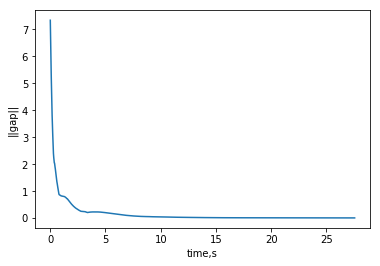

In [8]:
fig, ax = plt.subplots()
ax.plot(MIRROR_RESULTS[1],MIRROR_RESULTS[2])
ax.set_ylabel("||gap||")
ax.set_xlabel("time,s")
#ax.set_yscale('log')
plt.show()

### По итерациям

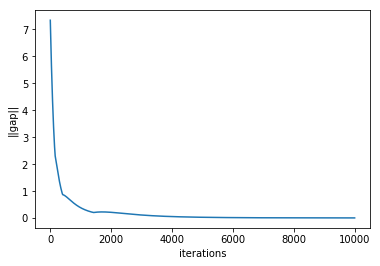

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(range(len(MIRROR_RESULTS[2])),MIRROR_RESULTS[2])
ax.set_ylabel("||gap||")
ax.set_xlabel("iterations");
#ax.set_yscale('log')
plt.show()

## __(в)__ Для этой же задачи напишите итерацию метода Франка-Вульфа. Реализуйте этот метод. Постройте для него график сходимости по времени и по итерациям. Добавьте эти графики к графикам для зеркального спуска. Сделайте вывод.

$s^k=\text{argmin}_{s \in C} \left< \nabla f(x^k);s-x^k \right>$

$s^k=\text{argmin}_{s \in C} \left< Ax^k;s-x^k \right>$

Заметим, что это задача минимизации линейного функционала на вероятностном симплексе, решается руками через поиск минимального коэффициента у вектора задающего линейный функционал

In [10]:
import GD
WOLF=GD.GradientDescent(f,gradient,1000, zeros,new_point_formula='wolf',step_choose='declining_step',stopping_criteria='gap',max_iterations=10000)
WOLF_RESULTS=WOLF.compute()

amount of iterations is 9999


### По времени

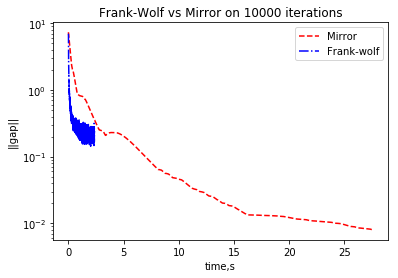

In [11]:
plt.plot(MIRROR_RESULTS[1], MIRROR_RESULTS[2], color='red',linestyle='--', label='Mirror')
plt.plot(WOLF_RESULTS[1], WOLF_RESULTS[2], color='blue',linestyle='-.', label='Frank-wolf')
 
plt.xlabel('time,s')
plt.ylabel('||gap||')
plt.title('Frank-Wolf vs Mirror on 10000 iterations')
plt.yscale('log')
plt.legend()
plt.show()


### Итерации

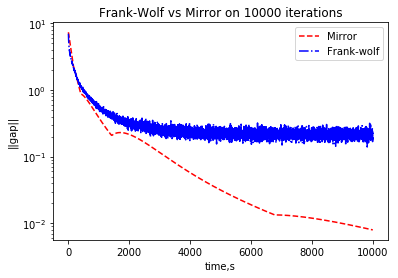

In [12]:
plt.plot(range(len(MIRROR_RESULTS[2])), MIRROR_RESULTS[2], color='red',linestyle='--', label='Mirror')
plt.plot(range(len(WOLF_RESULTS[2])), WOLF_RESULTS[2], color='blue',linestyle='-.', label='Frank-wolf')
 
plt.xlabel('time,s')
plt.ylabel('||gap||')
plt.title('Frank-Wolf vs Mirror on 10000 iterations')
plt.yscale('log')
plt.legend()
plt.show()


Франк-Вульф быстро доходит до какого-то приближения и затем осциллирует в его окрестности. В свою очередь, зеркальный алгоритм сходится медленно, но зато продолжает спускаться к своему минимуму